<a href="https://colab.research.google.com/github/GOURAVKAR/project/blob/main/chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chennai House Price Prediction
# PROBLEM STATEMENT
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

# Data
The historical sale data is available here: https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing

# Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# DATA PREPROCESSING
*Importing important libraries & Dataset.

*Identifying and handling the missing values.

*Taking care of Categorical Features.

*Normalizing of data set.

*Feature selection and scaling.

Let’s have a look at all of these points.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
# Remove deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
chennai = pd.read_csv("/content/train-chennai-sale.csv")
chennai=pd.DataFrame(chennai)
chennai

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [3]:
chennai.columns 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

FEATURE DESCRIPTION :-

PRT_ID - Propert ID of the dataset

AREA- Areas around chennai province.

INT_SQFT- The interior square feet of the property.

DIST_MAINROAD- distance of the property from the main road.

N_BEDROOM- Number of bedrooms in the house.

N_BATHROOM- Number of bathrooms in the house.

N_ROOM-Total number of rooms in the property.

SALE_COND- Sale condition of the property.

PARK_FACIL-Parking facility of the dataset.

BUILD_TYPE- Type of the building.

UTILITY_AVAIL-Utilities available around.

STREET-Street type around.

MZZONE- Zonal area differrence.MZ- Militarized Zone is a logical network without any access from the public network. Designed for systems without direct customer connectivity (e.g. databases containing sensitive data) and high security demands

QS_ROOMS-Quality review of previous buyer on rooms.

QS_BATHROOM-Quality review of previous buyer on bathroom.

QS_BEDROOM-Quality review of previous buyer on bedroom.

QS_OVERALL-Overall quality score assigned to the property by previous buyers.

REG_FEE- Registration fee of the property.

COMMIS- Commission to the property.

SALES_PRICE- Sales price of the propert (output prediction)



In [4]:
print("Number of Data points in the dataset: {0} \n&\nNumber of Features in dataset:{1}".format(chennai.shape[0],chennai.shape[1]))

Number of Data points in the dataset: 7109 
&
Number of Features in dataset:22


In [5]:
chennai.describe()  

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

Statistical interpretation of dataset (To give the relationship of numerical features in the dataset)

In [6]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
# We don't need this column neither in EDA nor in Modelling
# So drop it

chennai=chennai.drop(columns='PRT_ID')

In [8]:
#checking the null values in dataset
chennai.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

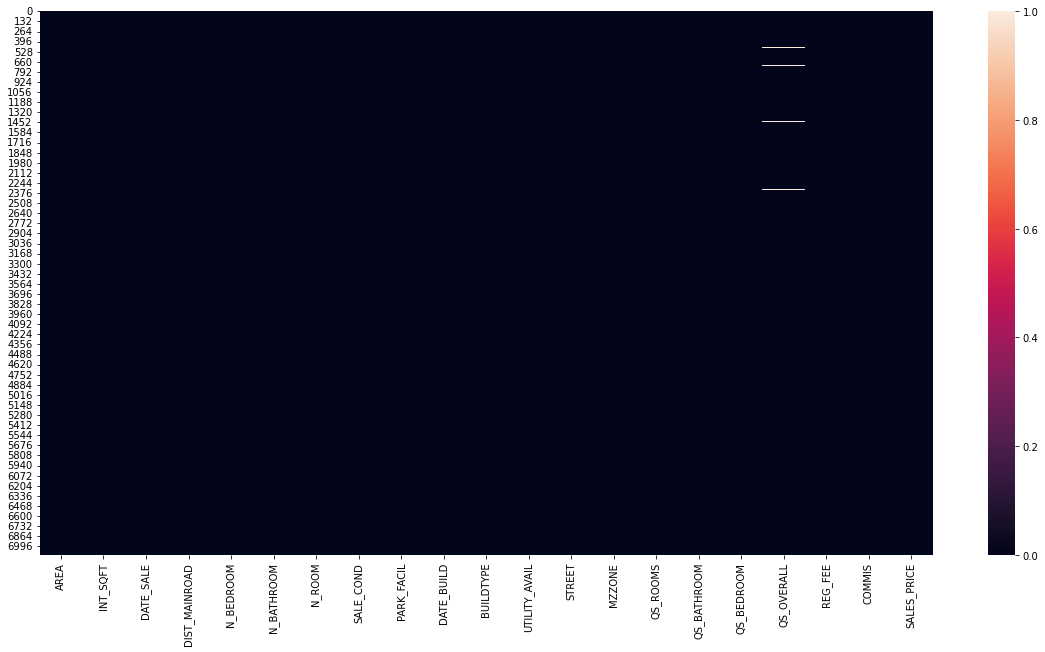

In [9]:
#checking the null values in dataset

plt.figure(figsize=(20,10))
sns.heatmap(chennai.isnull())

So, Over here we can see there are some null values are present in the dataset.

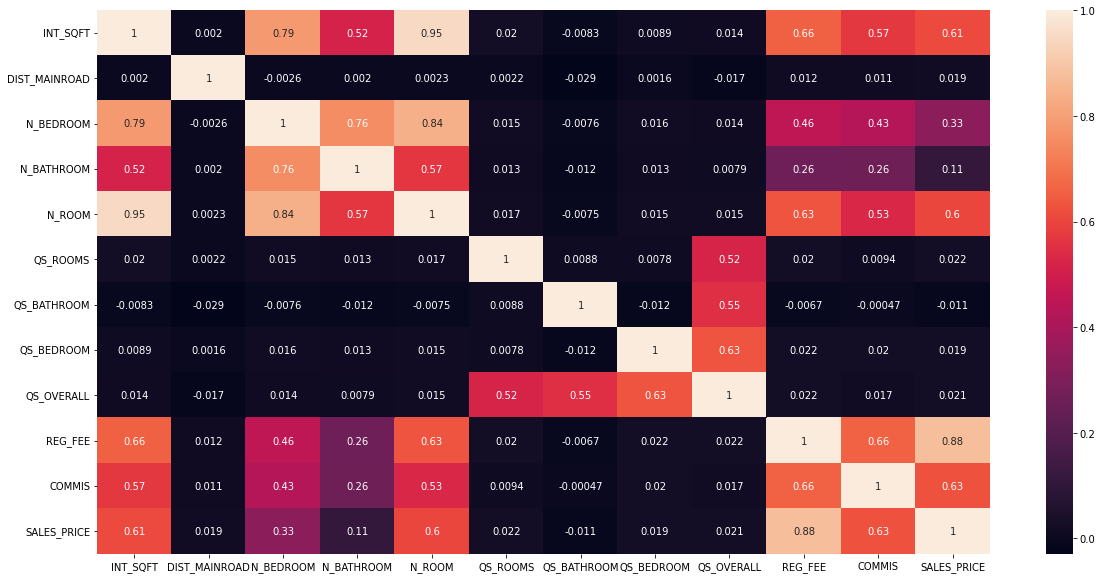

In [10]:
#plotting the correlation relationship between the all features
plt.figure(figsize=(20,10))
sns.heatmap(chennai.corr(), annot = True)

 checking the correlation of features in the dataset.

# one-by-one features organization
# AREA
In this feature, Areas around chennai province are represent as AREA.

In [11]:
chennai["AREA"].values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [12]:
chennai["AREA"].isnull().sum()

0

In [13]:
chennai["AREA"].describe()

count         7109
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object

In [14]:
chennai.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [15]:
# we have get some improper spelling mistakes over here. Need to  replace with correct values.
chennai["AREA"] = chennai["AREA"].replace({"Karapakam": "Karapakkam", "TNagar": "T Nagar", "Chrompt": "Chrompet",
                                           "Chrmpet": "Chrompet", "Ana Nagar": "Anna Nagar",
                                           "Chormpet": "Chrompet", "Adyr": "Adyar", "Velchery": "Velachery",
                                           "Ann Nagar": "Anna Nagar", "KKNagar": "KK Nagar"})

SO, The process of fixing or removing incorrect, or incomplete data within a dataset has been completed in organized manner.

In [16]:
chennai["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

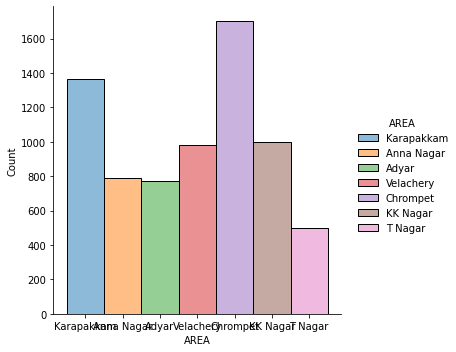

In [17]:
# AREA-Wise distribution of houses in Chennai city.
sns.displot(chennai, x="AREA", hue = "AREA")
plt.show()

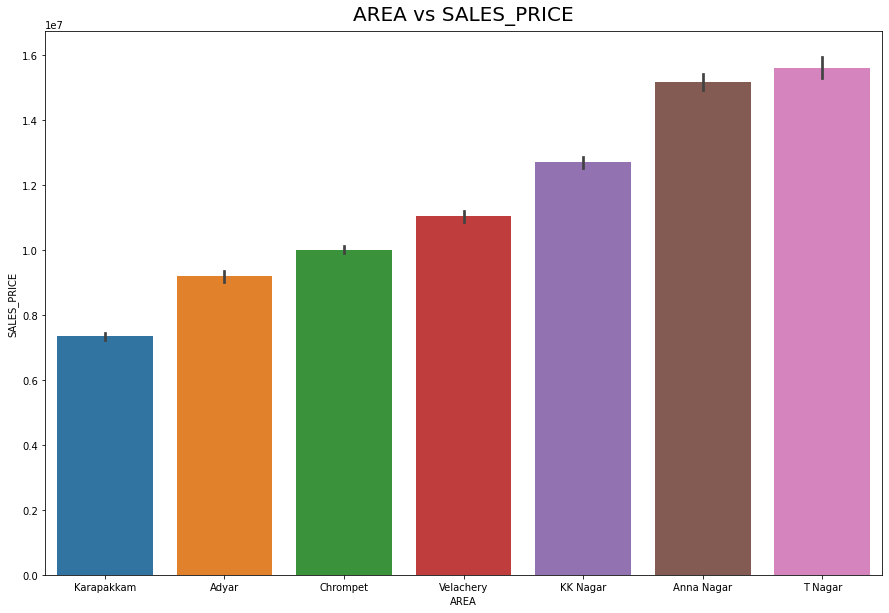

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x="AREA",y="SALES_PRICE", data=chennai,order=chennai.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
plt.title("AREA vs SALES_PRICE",fontsize=20,va="bottom")
plt.xlabel("AREA")
plt.ylabel("SALES_PRICE")
plt.show()

In [19]:

#label encoding for categorical feature present in the AREA column.

chennai["AREA"] = chennai["AREA"].map({"Karapakkam":1, "Adyar":2, "Chrompet":3,"Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7 })

# OBSERVATION :-

Chrompet & Karapakkam has a maximum number of house occurring area in Chennai city.

T Nagar is the least in demand but has high average SALES PRICE in Chennai city.

So, This plot representing their is a linear relationship with the output variable.

Doing ordinal label encoding for AREA feature for model training.

# INT_SQFT
In this feature, The interior square feet of the property are representing in INT_SQFT

In [20]:
chennai["INT_SQFT"].values   

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [21]:
chennai["INT_SQFT"].isnull().sum()

0

In [22]:
chennai["INT_SQFT"].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

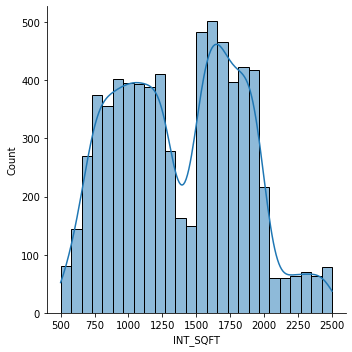

In [23]:
#NT_SQFT shows the distribution of measurement present in chennai city houses.
sns.displot(chennai, x="INT_SQFT", kde=True)


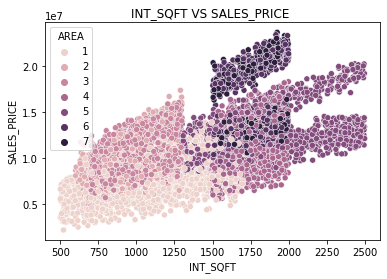

In [24]:
sns.scatterplot(data=chennai, x="INT_SQFT", y="SALES_PRICE", hue="AREA")
plt.xlabel("INT_SQFT")
plt.ylabel('SALES_PRICE')
plt.title("INT_SQFT VS SALES_PRICE ")
plt.show()

# OBSERVATION :-

So, This plot representing their is a linear relationship with the output variable.

Increasing INT_SQFT, Price of house is also increasing.

# DIST_MAINROAD
In this feature, the distance of the property from the main road representing DIST_MAINROAD.

        

In [25]:
chennai["DIST_MAINROAD"].values

array([131,  26,  70, ..., 152,  40, 156])

In [26]:
chennai["DIST_MAINROAD"].isnull().sum()

0

In [27]:
chennai["DIST_MAINROAD"].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

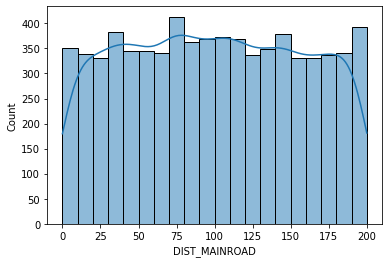

In [28]:
sns.histplot(data=chennai, x="DIST_MAINROAD", kde=True)

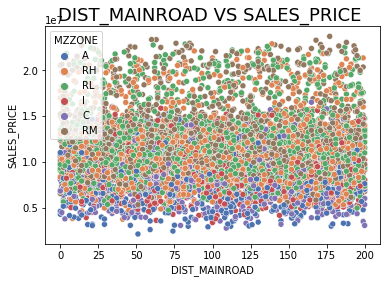

In [29]:
sns.scatterplot(data=chennai, x="DIST_MAINROAD", y="SALES_PRICE", hue="MZZONE", palette="deep")
plt.xlabel("DIST_MAINROAD")
plt.ylabel('SALES_PRICE')
plt.title("DIST_MAINROAD VS SALES_PRICE ", fontsize = 18)
plt.show()

# OBSERVATION :-

All distance having same density in DIST_MAINROAD plot.

Its a uniformly distributed graph.

Distance from mainroad have no impact on sales price.

This plot represent, There is no linear relationship between the both features.

# DATE_SALE
In this feature, the sale date of house represent in DATE_SALE.

In [30]:
chennai["DATE_SALE"].values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [31]:
chennai["DATE_SALE"].isnull().sum()

0

In [32]:
#converting these feature' object datatypes to date-time formats.
chennai["DATE_SALE"] = pd.to_datetime(chennai["DATE_SALE"])

In [33]:
# we will create DATE_SALE feature into SALE_YEAR.
chennai["SALE_YEAR"] = chennai['DATE_SALE'].dt.year

In [34]:
chennai=chennai.drop(columns=["DATE_SALE"])

In [35]:
chennai["SALE_YEAR"].describe()

count    7109.000000
mean     2009.768181
std         2.205979
min      2004.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2015.000000
Name: SALE_YEAR, dtype: float64

In [36]:
chennai['SALE_YEAR'].value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: SALE_YEAR, dtype: int64

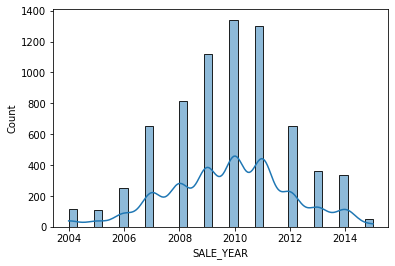

In [37]:
sns.histplot(data=chennai, x="SALE_YEAR", kde=True)

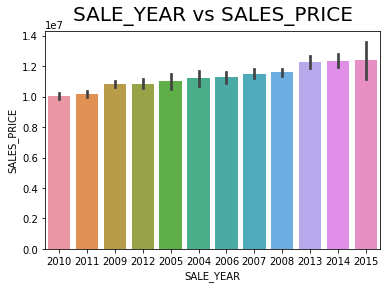

In [38]:
sns.barplot(x="SALE_YEAR",y="SALES_PRICE", data=chennai,order=chennai.groupby("SALE_YEAR")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_YEAR"])

plt.title("SALE_YEAR vs SALES_PRICE",fontsize=20,va="bottom")
plt.xlabel("SALE_YEAR")
plt.ylabel("SALES_PRICE")
plt.show()

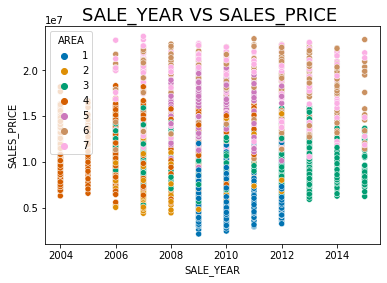

In [39]:
sns.scatterplot(data=chennai, x="SALE_YEAR", y="SALES_PRICE", hue="AREA", palette="colorblind")
plt.xlabel("SALE_YEAR")
plt.ylabel('SALES_PRICE')
plt.title("SALE_YEAR VS SALES_PRICE ", fontsize = 18)
plt.show()

# OBSERVATION :-

Maximum sales occuring between 2009 to 2011=< 1000 Houses.

This plot represent, There is linear relationship between the SALE_YEAR and output variable.

# N_BEDROOM
In this feature, Number of bedrooms in the house represent has N_BEDROOM.

In [40]:
chennai["N_BEDROOM"].values

array([1., 2., 1., ..., 2., 1., 3.])

In [41]:
chennai["N_BEDROOM"].isnull().sum()

1

In [42]:
#Either we drop it or Fill some value using mode.
chennai["N_BEDROOM"].fillna(chennai["N_BEDROOM"].mode()[0], inplace=True)

In [43]:
chennai["N_BEDROOM"].describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [44]:
chennai["N_BEDROOM"].value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

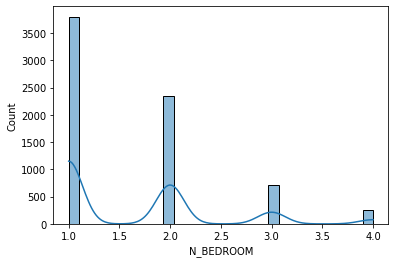

In [45]:
sns.histplot(data=chennai, x="N_BEDROOM", kde=True)

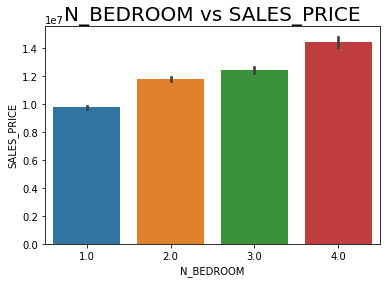

In [46]:
sns.barplot(x='N_BEDROOM',y="SALES_PRICE", data=chennai,order=chennai.groupby("N_BEDROOM")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["N_BEDROOM"])
plt.title("N_BEDROOM vs SALES_PRICE",fontsize=20)
plt.xlabel("N_BEDROOM")
plt.ylabel('SALES_PRICE')
plt.show()

# OBSERVATION :-

no. of houses are single bedroom= 3796

This plot representing the linear relationship between the N_BEDROOM and output variable.

# N_BATHROOM
In this feature, Number of bathrooms in the house are represent has N_BATHROOM.

In [47]:
chennai["N_BATHROOM"].values

array([1., 1., 1., ..., 1., 1., 2.])

In [48]:
chennai["N_BATHROOM"].isnull().sum()

5

In [49]:
#Either we drop it or Fill some value using mode.
chennai["N_BATHROOM"].fillna(chennai["N_BATHROOM"].mode()[0], inplace=True)

In [50]:
chennai["N_BATHROOM"].describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [51]:
chennai["N_BATHROOM"].value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

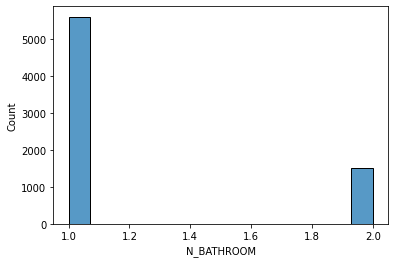

In [52]:
sns.histplot(data=chennai, x="N_BATHROOM")

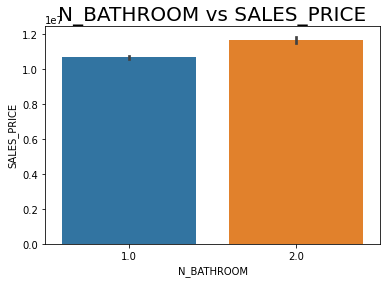

In [53]:
sns.barplot(x='N_BATHROOM',y="SALES_PRICE", data=chennai,order=chennai.groupby("N_BATHROOM")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["N_BATHROOM"])
plt.title("N_BATHROOM vs SALES_PRICE",fontsize=20)
plt.xlabel("N_BATHROOM")
plt.ylabel('SALES_PRICE')
plt.show()

# OBSERVATION :-

There is a linear relationship between the N_BATHROOM and output variable.

# N_ROOM
In this feature, Total number of rooms in the property represent has N_ROOM

In [54]:
chennai["N_ROOM"].values

array([3, 5, 3, ..., 4, 2, 5])

In [55]:
chennai["N_ROOM"].isnull().sum()

0

In [56]:
chennai["N_ROOM"].describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [57]:
chennai["N_ROOM"].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

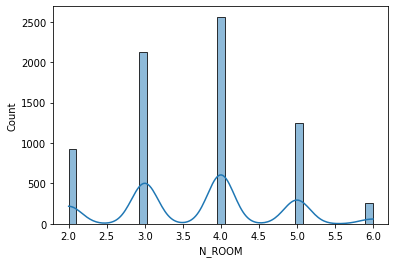

In [58]:
sns.histplot(data=chennai, x="N_ROOM", kde=True)

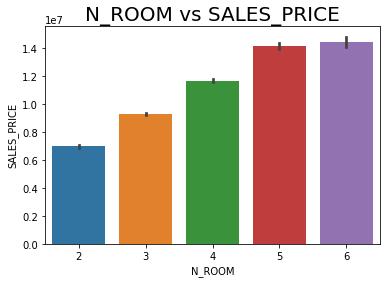

In [59]:
sns.barplot(x='N_ROOM',y="SALES_PRICE", data=chennai,order=chennai.groupby("N_ROOM")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["N_ROOM"])
plt.title("N_ROOM vs SALES_PRICE",fontsize=20)
plt.xlabel("N_ROOM")
plt.ylabel('SALES_PRICE')
plt.show()

# SALE_COND
In this feature, Sale condition of the property represent has SALE_COND.

In [60]:
chennai["SALE_COND"].values

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal Sale', 'Partial',
       'Partial'], dtype=object)

In [61]:
chennai["SALE_COND"].isnull().sum()

0

In [62]:
chennai["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [63]:
# we have get some improper spelling mistakes over here. Need to  replace with correct values.

chennai["SALE_COND"] = chennai["SALE_COND"].replace({"Ab Normal": "AbNormal", "Partiall": "Partial",
                                                     "Adj Land": "AdjLand", "PartiaLl": "Partial"})

In [64]:
chennai["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [65]:
chennai["SALE_COND"].describe()

count        7109
unique          5
top       AdjLand
freq         1439
Name: SALE_COND, dtype: object

In [66]:
chennai["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

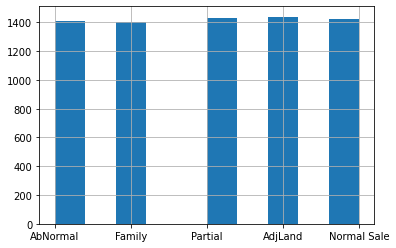

In [67]:
chennai["SALE_COND"].hist(bins=10)

All condition having equally in SALE_COND plot.

Its a uniformly distributed graph.

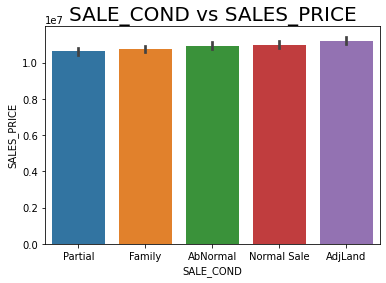

In [68]:
sns.barplot(x=chennai.SALE_COND,y=chennai.SALES_PRICE,order=chennai.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title("SALE_COND vs SALES_PRICE",fontsize=20)
plt.xlabel("SALE_COND")
plt.ylabel('SALES_PRICE')
plt.show()

In [69]:
#We use ordinal label encoding for SALE_COND (categorical variable)
chennai["SALE_COND"] = chennai["SALE_COND"].map({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"AdjLand" : 4})

# OBSERVATION :-

All condition having equally in SALE_COND plot.

Its a uniformly distributed graph.

In this plot, there is a linear relationship between the SALE_COND and output variable.

Doing ordinal label encoding for SALE_COND feature for model training.

# PARK_FACIL
In this feature, Parking facility of the dataset are represent in PARK_FACIL

In [70]:
chennai["PARK_FACIL"].values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [71]:
chennai["PARK_FACIL"].isnull().sum()

0

In [72]:
chennai["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [73]:
## we have get some improper spelling mistakes over here. Need to  replace with correct values.
chennai["PARK_FACIL"] = chennai["PARK_FACIL"].replace({"Noo": 0, "No": 0, "Yes": 1})

In [74]:
chennai["PARK_FACIL"].unique()

array([1, 0])

In [75]:
chennai["PARK_FACIL"].describe()

count    7109.000000
mean        0.504572
std         0.500014
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PARK_FACIL, dtype: float64

In [76]:
chennai["PARK_FACIL"].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

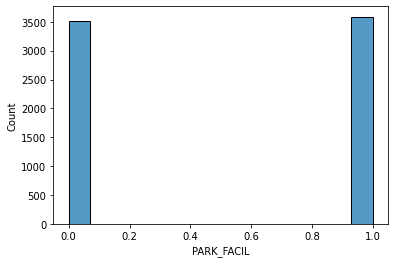

In [77]:
sns.histplot(data=chennai, x="PARK_FACIL")

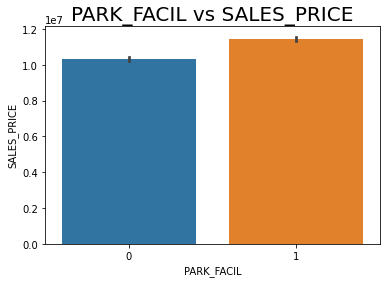

In [78]:
sns.barplot(x=chennai.PARK_FACIL,y=chennai.SALES_PRICE,order=chennai.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("PARK_FACIL vs SALES_PRICE",fontsize=20)
plt.xlabel("PARK_FACIL")
plt.ylabel('SALES_PRICE')
plt.show()

# OBSERVATION :-

This plot shows us a Bernoulli distribution present in this feature.

In this plot, there is a linear relationship between the PARK_FACIL and output variable.

# DATE_BUILD
In this feature,Type of the building has represent in DATE_BUILD

In [79]:
chennai["DATE_BUILD"].values

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [80]:
chennai["DATE_BUILD"].isnull().sum()

0

In [81]:
#converting these feature' object datatypes to date/time formats.
chennai["DATE_BUILD"] = pd.to_datetime(chennai["DATE_BUILD"])

In [82]:
# we will create DATE_BUILD feature into BUILD_YEAR.
chennai["BUILD_YEAR"] = chennai['DATE_BUILD'].dt.year

In [83]:
chennai = chennai.drop(columns= ["DATE_BUILD"])

In [84]:
chennai["BUILD_YEAR"].describe()

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: BUILD_YEAR, dtype: float64

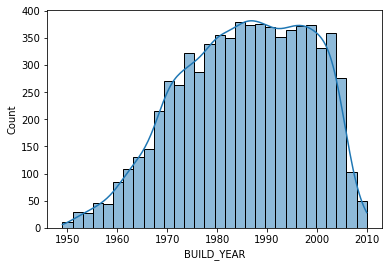

In [85]:
sns.histplot(data=chennai, x="BUILD_YEAR", kde=True)

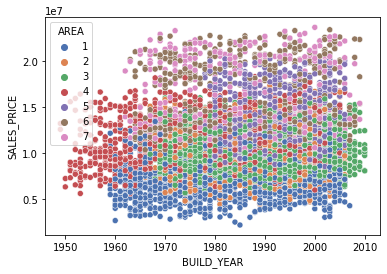

In [86]:
sns.scatterplot(data=chennai, x="BUILD_YEAR", y="SALES_PRICE", hue="AREA", palette="deep")

# OBSERVATION :-

Their is no linear relationship between the BUILB_YEAR and SALES_PRICE but it has some impact on output variable also.

# BUILDTYPE
In this feature, Type of the building are represent in BUILDTYPE.

In [87]:
chennai["BUILDTYPE"].values

array(['Commercial', 'Commercial', 'Commercial', ..., 'House',
       'Commercial', 'Others'], dtype=object)

In [88]:
chennai["BUILDTYPE"].isnull().sum()

0

In [89]:
chennai["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [90]:
# we have get some improper spelling mistakes over here. Need to  replace with correct values.

chennai["BUILDTYPE"] = chennai["BUILDTYPE"].replace({"Comercial": "Commercial", "Other": "Others"})

In [91]:
chennai["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [92]:
chennai["BUILDTYPE"].describe()

count      7109
unique        3
top       House
freq       2444
Name: BUILDTYPE, dtype: object

In [93]:
chennai["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

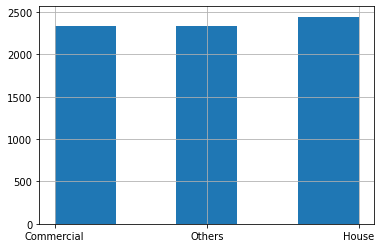

In [94]:
chennai["BUILDTYPE"].hist(bins = 5)

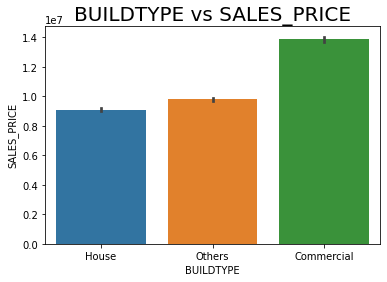

In [95]:
sns.barplot(x=chennai.BUILDTYPE,y=chennai.SALES_PRICE, order=chennai.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("BUILDTYPE vs SALES_PRICE",fontsize=20)
plt.xlabel("BUILDTYPE")
plt.ylabel('SALES_PRICE')
plt.show()

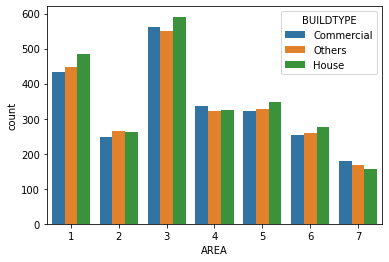

In [96]:
sns.countplot(x = 'AREA',
            hue = 'BUILDTYPE',
            data = chennai)

In [97]:
# one-hot encoding for model training

chennai = pd.get_dummies(chennai, columns=["BUILDTYPE"])

# OBSERVATION :-

Its a uniformly distributed graph.

BUILDTYPE have not linear relationship but effect SALE_PRICE.

With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to BUILDTYPE feature.

# UTILITY_AVAIL
In this feature, Utilities available around the houses represent in UTILITY_AVAIL.

In [98]:
chennai["UTILITY_AVAIL"].values

array(['AllPub', 'AllPub', 'ELO', ..., 'NoSeWa', 'ELO', 'ELO'],
      dtype=object)

In [99]:
chennai["UTILITY_AVAIL"].isnull().sum()

0

In [100]:
chennai["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [101]:
# we have get some improper spelling mistakes over here. Need to  replace with correct values.

chennai["UTILITY_AVAIL"] = chennai["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})



SO, The process of fixing or removing incorrect, or incomplete data within a SALE_COND has been completed in organized manner

In [102]:
chennai["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [103]:
chennai["UTILITY_AVAIL"].describe()

count       7109
unique         4
top       AllPub
freq        1887
Name: UTILITY_AVAIL, dtype: object

In [104]:
chennai["UTILITY_AVAIL"].value_counts()

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

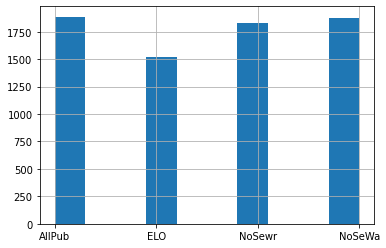

In [105]:
chennai["UTILITY_AVAIL"].hist(bins=10)

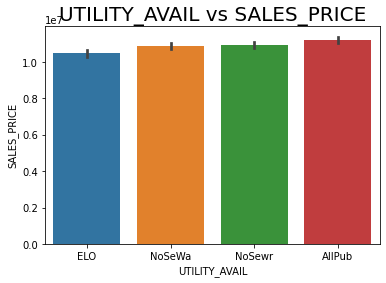

In [106]:
sns.barplot(x=chennai.UTILITY_AVAIL,y=chennai.SALES_PRICE,order=chennai.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("UTILITY_AVAIL vs SALES_PRICE",fontsize=20)
plt.xlabel("UTILITY_AVAIL")
plt.ylabel('SALES_PRICE')
plt.show()

In [107]:
#label encoding for categorical feature present in the  UTILITY_AVAIL column.
chennai["UTILITY_AVAIL"] = chennai["UTILITY_AVAIL"].map({"ELO": 1, "NoSeWa": 2, "NoSewr" : 3, "AllPub": 4})

# OBSERVATION :-

In this feature, we have seen there is uniformly distributed graph present over here.

there is linear relationship between both the UTILITY_AVAIL and SALES_PRICE.

Doing ordinal label encoding for UTALITY_AVAIL feature for model training.

# STREET
In this feature, Street type around the houses are represent as STREET.

In [108]:
chennai["STREET"].values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [109]:
chennai["STREET"].isnull().sum()

0

In [110]:
chennai["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [111]:
# we have get some improper spelling mistakes over here. Need to  replace with correct values.

chennai["STREET"] = chennai["STREET"].replace({"Pavd": "Paved", "NoAccess": "No Access"})


In [112]:
chennai["STREET"].describe()

count      7109
unique        3
top       Paved
freq       2572
Name: STREET, dtype: object

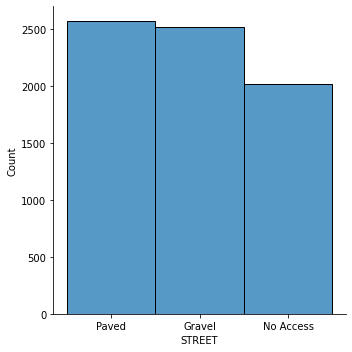

In [113]:
sns.displot(chennai, x="STREET")

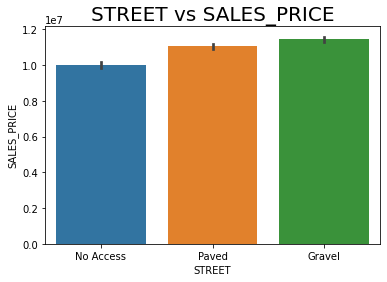

In [114]:
sns.barplot(x=chennai.STREET,y=chennai.SALES_PRICE,order=chennai.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("STREET vs SALES_PRICE",fontsize=20)
plt.xlabel("STREET")
plt.ylabel('SALES_PRICE')
plt.show()

In [115]:
#label encoding for categorical feature present in the STREET column.

chennai["STREET"] = chennai["STREET"].map({"No Access": 0,"Paved": 1, "Gravel": 2})

# OBSERVATION :-

In these feature, it has been Uniformly distributed the graph.

there is linear relationship between both the STREET and SALE_PRICE.

Doing ordinal label encoding for STREET feature for model training.

# MZZONE
MZZONE- Zonal area differrence.MZ- Militarized Zone is a logical network without any access from the public network. Designed for systems without direct customer connectivity (e.g. databases containing sensitive data) and high security demands

In [116]:
chennai["MZZONE"].values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [117]:
chennai["MZZONE"].isnull().sum()

0

In [118]:
chennai["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [119]:
chennai["MZZONE"].describe()

count     7109
unique       6
top         RL
freq      1858
Name: MZZONE, dtype: object

In [120]:
chennai["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

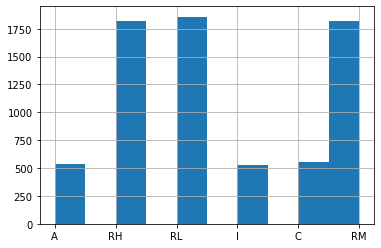

In [121]:
chennai["MZZONE"].hist(bins = 10)

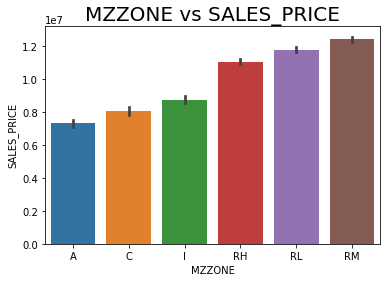

In [122]:
sns.barplot(x=chennai.MZZONE,y=chennai.SALES_PRICE,order=chennai.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title("MZZONE vs SALES_PRICE",fontsize=20)
plt.xlabel("MZZONE")
plt.ylabel('SALES_PRICE')
plt.show()


In [123]:
#label encoding for categorical feature present in the MZZONE column.

chennai["MZZONE"] = chennai["MZZONE"].map({"A": 1,"C": 2, "I": 3, "RH": 4, "RL": 5, "RM" : 6})

# OBSERVATION :-

There is a linear relationship between both the MOZZONE and SALE_PRICE(output variable).

RL(1858), RH(1822), RM(1817) have maximum houses are there.

Doing ordinal label encoding for MZZONE feature for model training.

# QS_ROOMS
In this feature, Quality review of previous buyer on rooms represent as QS_ROOMS.

In [124]:
chennai["QS_ROOMS"].values

array([4. , 4.9, 4.1, ..., 4.3, 4.6, 3.1])

In [125]:
chennai["QS_ROOMS"].isnull().sum()


0

In [126]:
chennai["QS_ROOMS"].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [127]:
chennai["QS_ROOMS"].describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

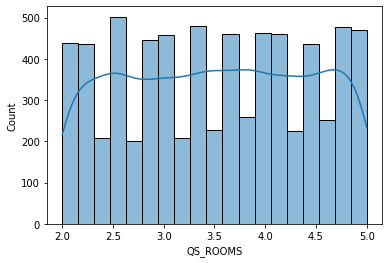

In [128]:
sns.histplot(data=chennai, x="QS_ROOMS", kde=True)

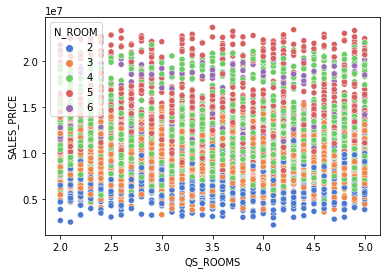

In [129]:
sns.scatterplot(data=chennai, x="QS_ROOMS", y="SALES_PRICE", hue="N_ROOM" , palette="muted")

In [130]:
chennai = chennai.drop(["QS_ROOMS",], axis = 1)

# OBSERVATION :-

It has a uniformly distributed graph.

There is no linear relationship between the both QS_ROOMS and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# QS_BATHROOM
In this feature, Quality review of previous buyer on bathroom represent as QS_BATHROOM.

In [131]:
chennai["QS_BATHROOM"].values

array([3.9, 4.2, 3.8, ..., 4.2, 3.8, 3.5])

In [132]:
chennai["QS_BATHROOM"].isnull().sum()

0

In [133]:
chennai["QS_BATHROOM"].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [134]:
chennai["QS_BATHROOM"].describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

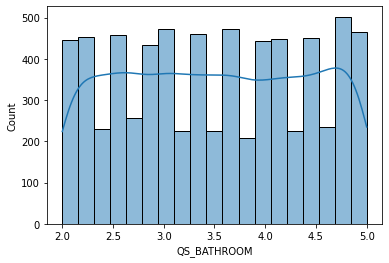

In [135]:
sns.histplot(data=chennai, x="QS_BATHROOM", kde=True)

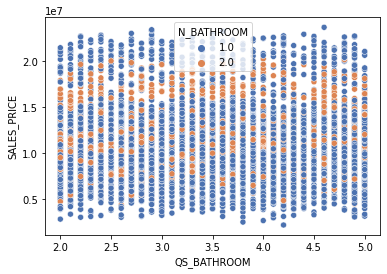

In [136]:
sns.scatterplot(data=chennai, x="QS_BATHROOM", y="SALES_PRICE", hue="N_BATHROOM" , palette="deep")

In [137]:
chennai = chennai.drop([ "QS_BATHROOM",], axis = 1)

# OBSERVATION :-

There is no linear relationship between both the QS_BATHROOM and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# QS_BEDROOM
In this feature, Quality review of previous buyer on bedroom as represent as QS_BEDROOM.

In [138]:
chennai["QS_BEDROOM"].values

array([4.9, 2.5, 2.2, ..., 2.9, 4.1, 4.3])

In [139]:
chennai["QS_BEDROOM"].isnull().sum()

0

In [140]:
chennai["QS_BEDROOM"].unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [141]:
chennai["QS_BEDROOM"].describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

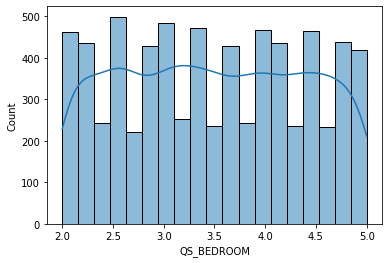

In [142]:
sns.histplot(data=chennai, x="QS_BEDROOM", kde=True)

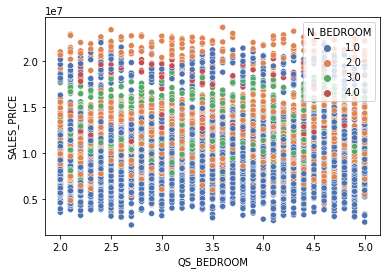

In [143]:
sns.scatterplot(data=chennai, x="QS_BEDROOM", y="SALES_PRICE", hue="N_BEDROOM" , palette="deep")

In [144]:
chennai = chennai.drop(["QS_BEDROOM"], axis = 1)

# OBSERVATION :-

It has a uniformly distributed graph.

There is no linear relationship between both the QS_BEDROOMS and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# QS_OVERALL
In this feature, Overall quality score assigned to the property by previous buyers represent as QS_OVERALL

In [145]:
chennai["QS_OVERALL"].values

array([4.33 , 3.765, 3.09 , ..., 3.84 , 4.16 , 3.64 ])

In [146]:
chennai["QS_OVERALL"].isnull().sum()

48

In [147]:
chennai["QS_OVERALL"].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

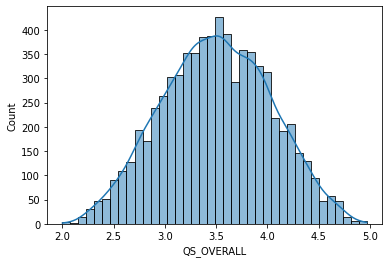

In [148]:
sns.histplot(data=chennai, x="QS_OVERALL", kde=True)

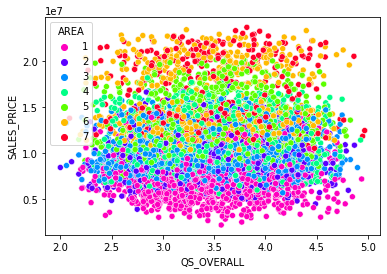

In [149]:
sns.scatterplot(data=chennai, x="QS_OVERALL", y="SALES_PRICE", hue="AREA" , palette="gist_rainbow_r")

In [150]:
chennai = chennai.drop(["QS_OVERALL"], axis = 1)

# OBSERVATION :-

It has a normal distribution graph over here.

There is no linaer relationship between both the QS_OVERALL and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# REG_FEE
In this feature, Registration fee of the property represent as REG_FEE.

In [151]:
chennai["REG_FEE"].values

array([380000, 760122, 421094, ..., 317354, 425350, 349177])

In [152]:
chennai["REG_FEE"].isnull().sum()

0

In [153]:
chennai["REG_FEE"].unique()

array([380000, 760122, 421094, ..., 317354, 425350, 349177])

In [154]:
chennai["REG_FEE"].describe()

count      7109.000000
mean     376938.330708
std      143070.662010
min       71177.000000
25%      272406.000000
50%      349486.000000
75%      451562.000000
max      983922.000000
Name: REG_FEE, dtype: float64

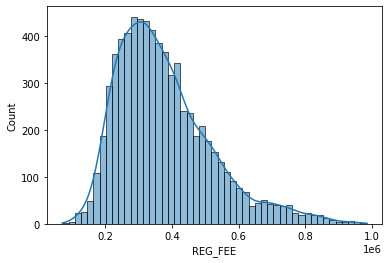

In [155]:
sns.histplot(data=chennai, x="REG_FEE", kde=True)

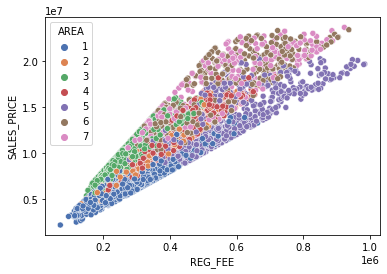

In [156]:
sns.scatterplot(data=chennai, x="REG_FEE", y="SALES_PRICE", hue="AREA" , palette="deep")

In [157]:
chennai = chennai.drop(["REG_FEE"], axis = 1)

# OBSERVATION :-

There is no linear relationship between both the REG_FEE and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# COMMIS
In this feature, Commission to the property represent as COMMIS.

In [158]:
chennai["COMMIS"].values

array([144400, 304049,  92114, ..., 167028, 119098,  79812])

In [159]:
chennai["COMMIS"].isnull().sum()

0

In [160]:
chennai["COMMIS"].unique()

array([144400, 304049,  92114, ..., 167028, 119098,  79812])

In [161]:
chennai["COMMIS"].describe()

count      7109.000000
mean     141005.726544
std       78768.093718
min        5055.000000
25%       84219.000000
50%      127628.000000
75%      184506.000000
max      495405.000000
Name: COMMIS, dtype: float64

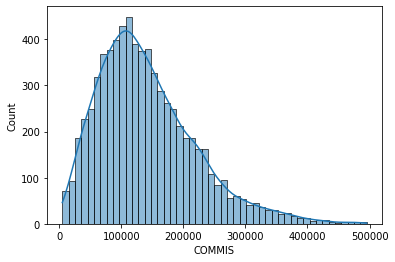

In [162]:
sns.histplot(data=chennai, x="COMMIS", kde=True)

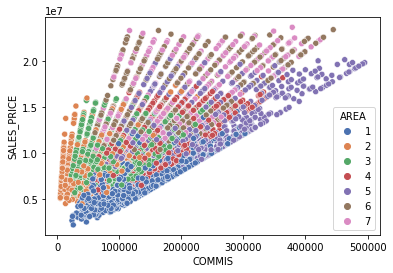

In [163]:
sns.scatterplot(data=chennai, x="COMMIS", y="SALES_PRICE", hue="AREA" , palette="deep")

In [164]:
chennai = chennai.drop(["COMMIS"], axis = 1)

# OBSERVATION :-

There is no linear relationship between both the COMMIS and SALES_PRICE.

So, don't need these feature for model training and further process. Which has been deleted over here.

# SALES_PRICE
In this feature, sales price of the propert (output prediction) represent as SALES_PRICE.



In [165]:
chennai["SALES_PRICE"].values

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [166]:
chennai["SALES_PRICE"].isnull().sum()

0

In [167]:
chennai["SALES_PRICE"].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

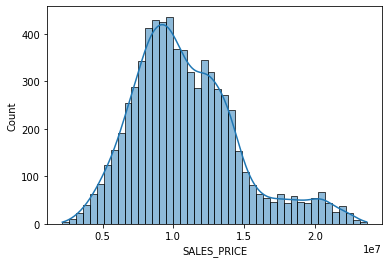

In [168]:
sns.histplot(data=chennai, x="SALES_PRICE", kde=True)

# OBSERVATION :-

These feature is a OUTPUT prediction(target variable).

# AGE_OF_HOUSE


In [169]:
chennai['AGE_OF_HOUSE']=chennai['SALE_YEAR'] - chennai['BUILD_YEAR']

In [170]:
chennai["AGE_OF_HOUSE"].values

array([44, 11, 20, ..., 28, 32, 44])

In [171]:
chennai["AGE_OF_HOUSE"].isnull().sum()

0

In [172]:
chennai["AGE_OF_HOUSE"].describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE_OF_HOUSE, dtype: float64

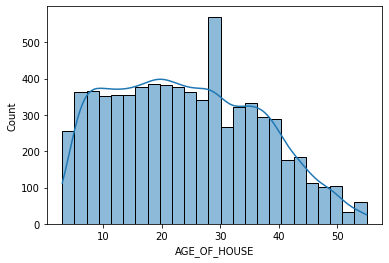

In [173]:
sns.histplot(data=chennai, x="AGE_OF_HOUSE", kde=True)

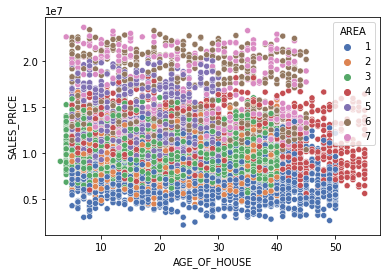

In [174]:
sns.scatterplot(data=chennai, x="AGE_OF_HOUSE", y="SALES_PRICE", hue="AREA" , palette="deep")


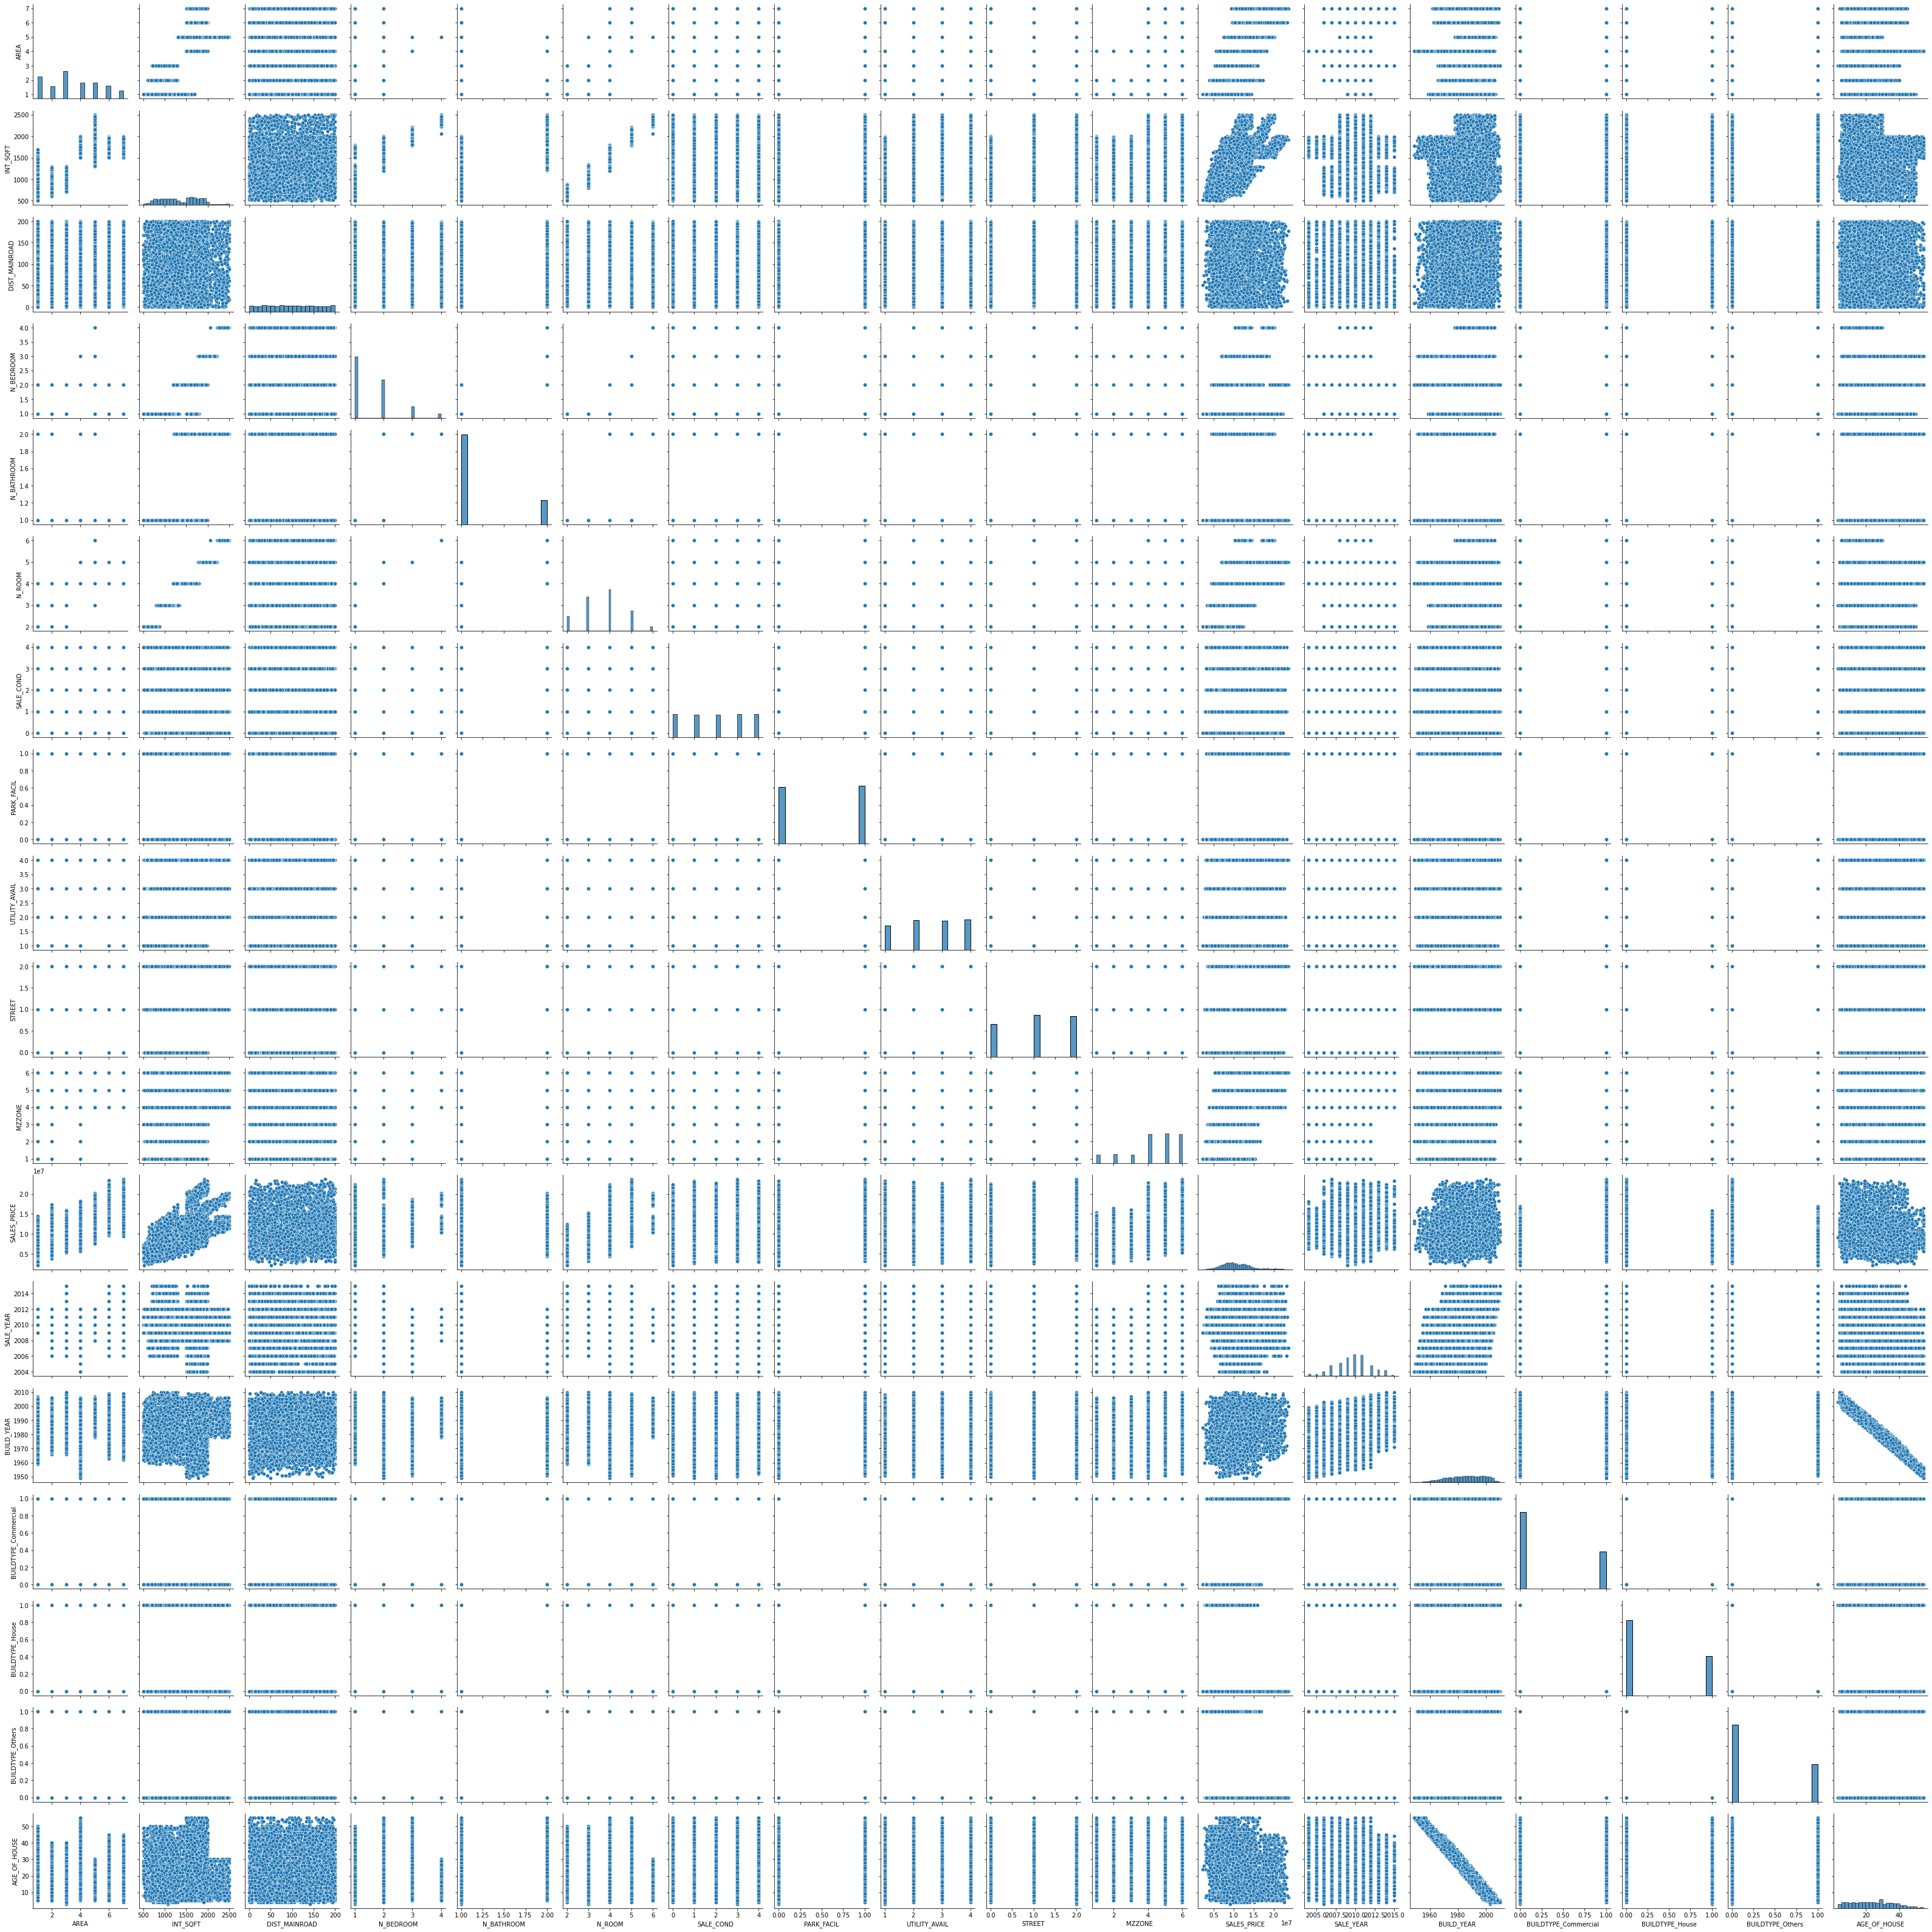

In [175]:
#univariate distribution
sns.pairplot(chennai,kind='scatter')

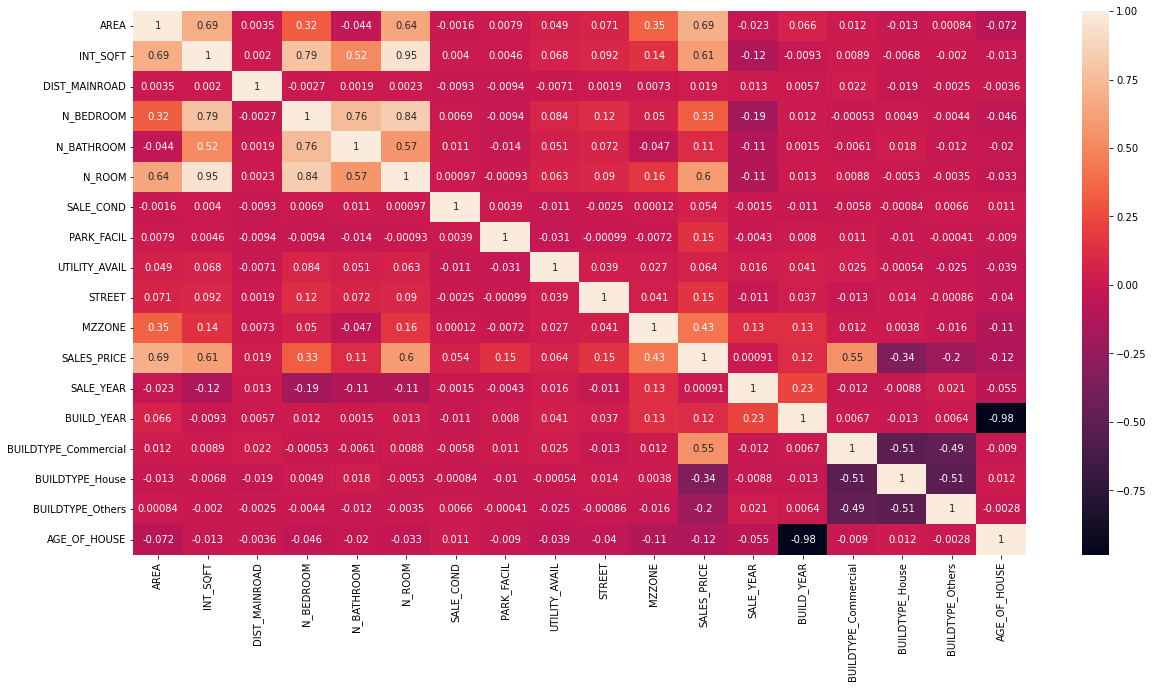

In [176]:
#After data preprocessing we can see how features are correlated with each other over here.
plt.figure(figsize= (20,10))
sns.heatmap(chennai.corr(), annot = True)

# Feature Selection & Splitting
Feature selection is nothing but a selection of required independent features. Selecting the important independent features which have more relation with the dependent feature will help to build a good model.

In [177]:
chennai.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'AGE_OF_HOUSE'],
      dtype='object')

so, this features are selecting for our machine learning model. In which, we have selected 18 features after the data preprocessing were 17 features are independent features & 01 dependent feature are available.

In [178]:
chennai.head(5)

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     1      1004            131        1.0         1.0       3          2   
1     6      1986             26        2.0         1.0       5          2   
2     2       909             70        1.0         1.0       3          2   
3     4      1855             14        3.0         2.0       5          1   
4     1      1226             84        1.0         1.0       3          2   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  SALE_YEAR  \
0           1              4       1       1      7600000       2011   
1           0              4       2       4     21717770       2006   
2           1              1       2       5     13159200       2012   
3           0              3       1       3      9630290       2010   
4           1              4       2       2      7406250       2009   

   BUILD_YEAR  BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  \
0        1967                     1                0                 0   
1        1995                     1                0                 0   
2        1992                     1                0                 0   
3        1988                     0                0                 1   
4        1979                     0                0                 1   

   AGE_OF_HOUSE  
0            44  
1            11  
2            20  
3            22  
4            30

In [179]:
Y=chennai['SALES_PRICE']          #Dependent feature(output data)
Y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [180]:
X=chennai.drop(columns=["SALES_PRICE"])         #Independent features(input data)
X.head(5)

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     1      1004            131        1.0         1.0       3          2   
1     6      1986             26        2.0         1.0       5          2   
2     2       909             70        1.0         1.0       3          2   
3     4      1855             14        3.0         2.0       5          1   
4     1      1226             84        1.0         1.0       3          2   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  SALE_YEAR  BUILD_YEAR  \
0           1              4       1       1       2011        1967   
1           0              4       2       4       2006        1995   
2           1              1       2       5       2012        1992   
3           0              3       1       3       2010        1988   
4           1              4       2       2       2009        1979   

   BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  AGE_OF_HOUSE  
0                     1                0                 0            44  
1                     1                0                 0            11  
2                     1                0                 0            20  
3                     0                0                 1            22  
4                     0                0                 1            30

# Evaluating Data Mining Model
Separating data into training and testing sets is an important part of evaluating data mining models.

most of the data is used for training and a smaller portion of the data is used for testing.

In [181]:
#spliting into train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=10)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (5331, 17)
xtest shape :  (1778, 17)
ytrain shape :  (5331,)
ytest shape :  (1778,)


# Feature Scaling
Feature scaling is used to reduce the variance effects and to overcome the fitting problems.

Using standardization method for all features are having high values, not 0 and 1.

It is a technique to stardardize the independent features that present in a fixed range to bring all values to the same magnitudes.

In standardization, the mean of the independent features is 0 and the standard deviation is 1.

# Z= X-MU/SIGMA

In [182]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Model Building
This project is a supervised machine learning model.

In which we can solving a regression problem.

Were different types of algorithms are using to achieved the best accuracy.

**1. Linear Regression Algorithm**

In [183]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [184]:
# Given the features of test dataset, were it will gives the final predictions.

y_pred_lr = lr.predict(X_test)
y_pred_lr

array([16142864.95252335, 18505514.06315609, 13645569.24067802, ...,
        9813423.89785324, 17710598.0186174 , 17709421.10377872])

In [185]:
Data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_lr})
Data

Actual     Predicted
461   15664740  1.614286e+07
3358  19286610  1.850551e+07
3751  13308490  1.364557e+07
2386  12496560  1.274218e+07
1125   9082000  9.181854e+06
...        ...           ...
6614  14844750  1.495129e+07
857    8778570  9.230932e+06
3468   9586150  9.813424e+06
6641  18035580  1.771060e+07
3556  18670480  1.770942e+07

[1778 rows x 2 columns]

In [186]:
# Calculating R2 value to evaluate model

from sklearn import metrics
X_lin = metrics.r2_score(Y_test,y_pred_lr)
print('R2- SCORE:', round((X_lin*100),2),"%")

R2- SCORE: 92.65 %


**2. KNN Algorithm**

In [187]:
# fit the model

from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor()
model_KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [188]:
y_pred_KNN = model_KNN.predict(X_test)
y_pred_KNN

array([16637822., 19001810., 13648222., ..., 10692284., 17872292.,
       16802456.])

In [189]:
# Actual and Predicted values

Data_KNN= pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_KNN})
Data_KNN

Actual   Predicted
461   15664740  16637822.0
3358  19286610  19001810.0
3751  13308490  13648222.0
2386  12496560  11640108.0
1125   9082000   9344236.0
...        ...         ...
6614  14844750  14803744.0
857    8778570  10213636.0
3468   9586150  10692284.0
6641  18035580  17872292.0
3556  18670480  16802456.0

[1778 rows x 2 columns]

In [190]:
from sklearn import metrics
X_KNN = metrics.r2_score(Y_test,y_pred_KNN)
print('R2- SCORE:', round((X_KNN*100),2),"%")

R2- SCORE: 92.53 %


### **3. DECISION TREE Algorithm**

In [191]:
# To identify the proper depth for decision tree model.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train, Y_train)
  valAccuracy = cross_val_score(dt, X_train, Y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH:", depth, " ","R2-Score: ", np.mean(valAccuracy))

DEPTH: 1   R2-Score:  0.347118098239271
DEPTH: 2   R2-Score:  0.6805891807086866
DEPTH: 3   R2-Score:  0.7999825514227237
DEPTH: 4   R2-Score:  0.8790449379744987
DEPTH: 5   R2-Score:  0.9114544899624455
DEPTH: 6   R2-Score:  0.9333067648144621
DEPTH: 7   R2-Score:  0.9485698502869504
DEPTH: 8   R2-Score:  0.957904003407853
DEPTH: 9   R2-Score:  0.9636030372771408
DEPTH: 10   R2-Score:  0.9657733959342245
DEPTH: 20   R2-Score:  0.9661191225282705
DEPTH: 40   R2-Score:  0.9657412171766857
DEPTH: 60   R2-Score:  0.9656356203105524


In [192]:
# fit the model

dt = DecisionTreeRegressor(max_depth=20)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=20)

In [193]:
y_pred_DT = dt.predict(X_test)
y_pred_DT

array([15344360., 20119920., 14244070., ...,  8929340., 17398940.,
       18485760.])

In [194]:
# Actual vs Predicted values

df_tree=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_DT})
df_tree

Actual   Predicted
461   15664740  15344360.0
3358  19286610  20119920.0
3751  13308490  14244070.0
2386  12496560  12572700.0
1125   9082000   7730250.0
...        ...         ...
6614  14844750  14737720.0
857    8778570   9092600.0
3468   9586150   8929340.0
6641  18035580  17398940.0
3556  18670480  18485760.0

[1778 rows x 2 columns]

In [195]:

from sklearn import metrics
X_tree = metrics.r2_score(Y_test,y_pred_DT)
print('R2- SCORE:', round((X_tree*100),2),"%")

R2- SCORE: 96.56 %


In [196]:
chennai.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'AGE_OF_HOUSE'],
      dtype='object')

In [197]:
feature = pd.Series(dt.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'SALE_YEAR', 'BUILD_YEAR','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','AGE_OF_HOUSE']).sort_values(ascending = False)
feature_score = feature*100
feature_score

AREA                    46.999106
BUILDTYPE_Commercial    33.225628
INT_SQFT                10.359860
MZZONE                   3.825055
PARK_FACIL               1.541371
N_BATHROOM               1.225352
STREET                   1.113145
BUILDTYPE_Others         0.412274
AGE_OF_HOUSE             0.253095
BUILD_YEAR               0.221845
DIST_MAINROAD            0.208707
SALE_COND                0.199351
BUILDTYPE_House          0.158285
SALE_YEAR                0.123631
UTILITY_AVAIL            0.109577
N_ROOM                   0.014543
N_BEDROOM                0.009174
dtype: float64

**3. RANDOM FOREST Algorithm**

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 100, max_depth = 7, max_features='sqrt')
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt')

In [199]:
y_pred_RF = rf.predict(X_test)

In [200]:
Data_rf= pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_RF})
Data_rf

Actual     Predicted
461   15664740  1.416641e+07
3358  19286610  1.854625e+07
3751  13308490  1.337482e+07
2386  12496560  1.203759e+07
1125   9082000  9.175069e+06
...        ...           ...
6614  14844750  1.419515e+07
857    8778570  8.881597e+06
3468   9586150  9.824669e+06
6641  18035580  1.680761e+07
3556  18670480  1.727100e+07

[1778 rows x 2 columns]

In [201]:
from sklearn import metrics
X_rf = metrics.r2_score(Y_test,y_pred_RF)
print('R2- SCORE:', round((X_rf*100),2),"%")

R2- SCORE: 95.6 %


In [202]:
feature = pd.Series(rf.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'SALE_YEAR', 'BUILD_YEAR','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','AGE_OF_HOUSE']).sort_values(ascending = False)
feature_score = feature*100
feature_score

BUILDTYPE_Commercial    25.220468
AREA                    23.249060
N_ROOM                  14.318534
INT_SQFT                14.227474
MZZONE                   6.642903
BUILDTYPE_House          5.745692
N_BEDROOM                3.592652
BUILDTYPE_Others         2.898242
N_BATHROOM               0.845849
PARK_FACIL               0.842865
STREET                   0.595534
AGE_OF_HOUSE             0.538205
SALE_YEAR                0.527574
BUILD_YEAR               0.392359
DIST_MAINROAD            0.150963
SALE_COND                0.120133
UTILITY_AVAIL            0.091493
dtype: float64

**5. XG BOOSTING Model**

In [203]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.6,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,Y_train) #train the model
  model.score(X_test, Y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))


Learning rate :  0.01  Train score :  -0.39628110639449776  Cross-Val score :  -0.4057552767656632
Learning rate :  0.02  Train score :  0.7432670227271997  Cross-Val score :  0.7387949397211552
Learning rate :  0.03  Train score :  0.9240074614049072  Cross-Val score :  0.9209035351730396
Learning rate :  0.04  Train score :  0.9620621652470628  Cross-Val score :  0.9594828099678189
Learning rate :  0.05  Train score :  0.9746230254831839  Cross-Val score :  0.9722609030176521
Learning rate :  0.06  Train score :  0.9807169145806889  Cross-Val score :  0.9787678748054374
Learning rate :  0.07  Train score :  0.9848916341648692  Cross-Val score :  0.9829458378391139
Learning rate :  0.08  Train score :  0.988220982035798  Cross-Val score :  0.9860781622207234
Learning rate :  0.09  Train score :  0.9903470704557527  Cross-Val score :  0.9887828391276091
Learning rate :  0.1  Train score :  0.9928609771296513  Cross-Val score :  0.9905375407753672
Learning rate :  0.11  Train score :  0

In [204]:
import warnings
warnings.filterwarnings('ignore')


In [205]:
model_XG = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model_XG.fit(X_train,Y_train) #train the model
model_XG.score(X_test, Y_test) # scoring the model - r2 squared

0.9973835749919634

In [206]:
XG_pred= model_XG.predict(X_test)
XG_pred

array([15296088., 19288246., 13110152., ...,  9647958., 17862506.,
       18596596.], dtype=float32)

In [207]:
Data_XG= pd.DataFrame({"Actual": Y_test, "Predicted": XG_pred})
Data_XG

Actual   Predicted
461   15664740  15296088.0
3358  19286610  19288246.0
3751  13308490  13110152.0
2386  12496560  12551366.0
1125   9082000   9003410.0
...        ...         ...
6614  14844750  14965154.0
857    8778570   8896212.0
3468   9586150   9647958.0
6641  18035580  17862506.0
3556  18670480  18596596.0

[1778 rows x 2 columns]

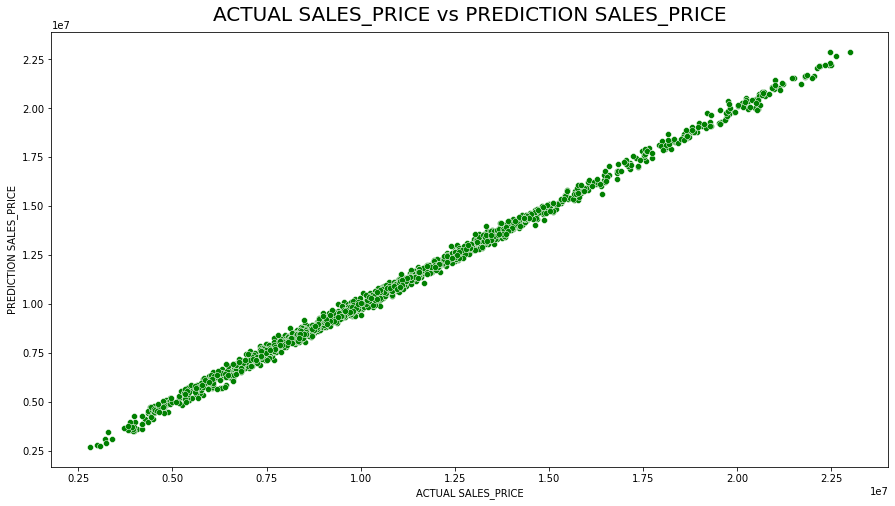

In [208]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= Y_test, y=XG_pred, color=["green"])
plt.title("ACTUAL SALES_PRICE vs PREDICTION SALES_PRICE", fontsize=20,va="bottom")
plt.xlabel("ACTUAL SALES_PRICE")
plt.ylabel("PREDICTION SALES_PRICE")
plt.show()

In [209]:
from sklearn import metrics
X_XG = metrics.r2_score(Y_test,XG_pred)
print('R2- SCORE:', round((X_XG*100),2),"%")

R2- SCORE: 99.74 %


In [210]:
feature = pd.Series(model_XG.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 
                                                            'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL',
                                                            'STREET','MZZONE', 'SALE_YEAR', 'BUILD_YEAR','BUILDTYPE_Commercial',
                                                            'BUILDTYPE_House', 'BUILDTYPE_Others','AGE_OF_HOUSE']).sort_values(ascending = False)
feature_score = feature*100
feature_score

BUILDTYPE_Commercial    40.858604
AREA                    37.575035
PARK_FACIL               4.768218
INT_SQFT                 3.975954
MZZONE                   3.503580
STREET                   2.782674
N_ROOM                   2.200224
BUILDTYPE_House          1.656153
N_BEDROOM                0.823048
SALE_COND                0.733777
BUILD_YEAR               0.324300
AGE_OF_HOUSE             0.251298
UTILITY_AVAIL            0.236804
BUILDTYPE_Others         0.212846
SALE_YEAR                0.041794
N_BATHROOM               0.040384
DIST_MAINROAD            0.015310
dtype: float32

**Find best model**

In [211]:
print("All Models R2 score are: ")
print("                          ")
print("Linear Regression Model: ", round((X_lin*100),2),"%")
print("KNN Model: ", round((X_KNN*100),2),"%")
print("Decision Tree Model: ", round((X_tree*100),2),"%")
print("Random Forest Model: ", round((X_rf*100),2),"%")
print("XG BOOST Model: ", round((X_XG*100),2),"%")

All Models R2 score are: 
                          
Linear Regression Model:  92.65 %
KNN Model:  92.53 %
Decision Tree Model:  96.56 %
Random Forest Model:  95.6 %
XG BOOST Model:  99.74 %


**Feature Importance**

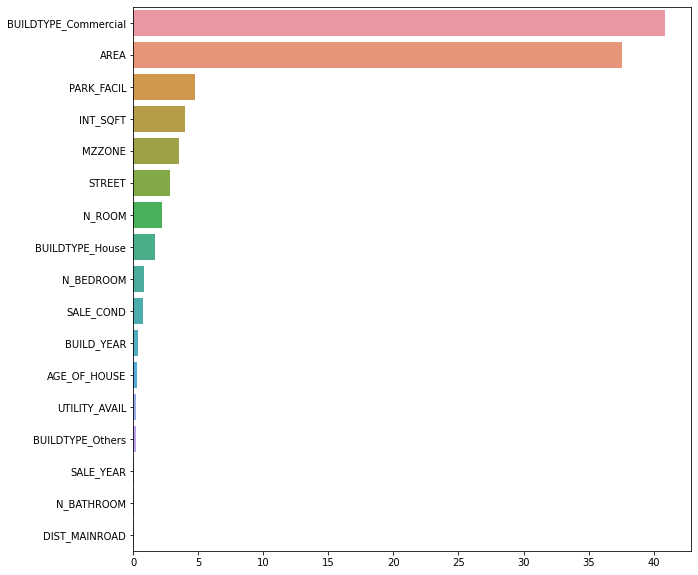

In [212]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_score, y=feature_score.index)

In [213]:
Top_features=feature_score.loc[feature_score >0.5]
Top_features

BUILDTYPE_Commercial    40.858604
AREA                    37.575035
PARK_FACIL               4.768218
INT_SQFT                 3.975954
MZZONE                   3.503580
STREET                   2.782674
N_ROOM                   2.200224
BUILDTYPE_House          1.656153
N_BEDROOM                0.823048
SALE_COND                0.733777
dtype: float32

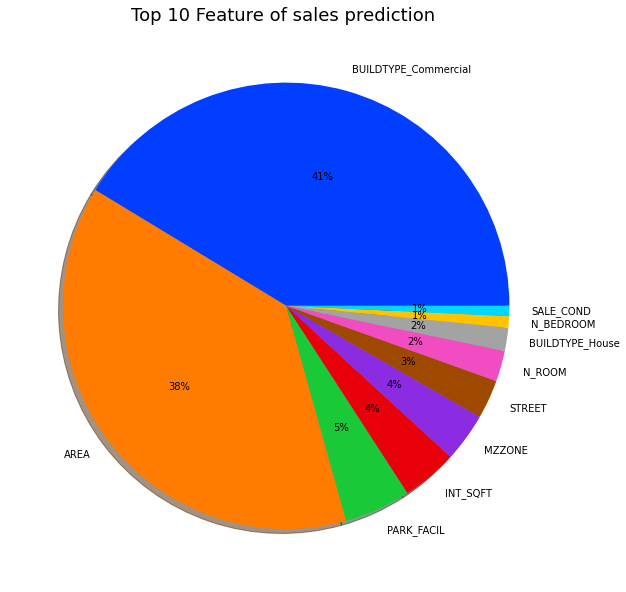

In [214]:
score=[40.858604, 37.575035, 4.768218,  3.975954, 3.503580, 2.782674, 2.200224, 1.656153, 0.823048, 0.733777]
features=['BUILDTYPE_Commercial', 'AREA',"PARK_FACIL", 'INT_SQFT', 'MZZONE',"STREET", "N_ROOM","BUILDTYPE_House", "N_BEDROOM", "SALE_COND" ]
plt.figure(figsize=(10,15))
colors = sns.color_palette('bright')
plt.pie(score, labels=features ,colors = colors, autopct = '%0.0f%%', shadow = True)
plt.title("Top 10 Feature of sales prediction ", fontsize = 18)
plt.show()

# **CONCLUSION :-**
1)I fit a 100% accuracy model by XG boosting algorithm.

2)Categorical variables playing a big role here,accordingly sellers can build the house to fetch more money,

Area Karapaakam & Chrompet has more sales so if sellers build the house there they can able to get more money.

